In [3]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные из Excel-файла
data = pd.read_excel('C:/Users/mtaig/Desktop/ds_lact_2.xlsx')

# Просмотр первых нескольких строк данных
print(data.head())

# Определяем признаки (X) и целевую переменную (y)
X = data[['Milk yield 305, kg - 1 Lac.', 'Fat  305, % - 1 lac.', 'Protein  305, % - 1 lac.', 'Live weightа - 1 lac.']]
y = data['Milk yield for the entire lactation, kg - 1 lac.']

# Разделяем данные на обучающую и тестовую выборки (80% для обучения, 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

# Делаем прогнозы на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим результаты
print("Коэффициенты модели:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Свободный член (intercept): {model.intercept_:.4f}")
print(f"Среднеквадратическая ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

# Пример: предсказание для новых данных
new_data = pd.DataFrame({
    'Milk yield 305, kg - 1 Lac.': [8000],
    'Fat  305, % - 1 lac.': [3.7],
    'Protein  305, % - 1 lac.': [3.2],
    'Live weightа - 1 lac.': [550]
})

prediction = model.predict(new_data)
print(f"Прогнозируемый объем производства молока за всю лактацию: {prediction[0]:.2f} кг")

   Milk yield 305, kg - 1 Lac.  Fat  305, % - 1 lac.  \
0                         7261                  3.63   
1                         7167                  3.83   
2                        10295                  3.55   
3                        10010                  3.66   
4                         8942                  3.62   

   Protein  305, % - 1 lac.  Live weightа - 1 lac.  \
0                      3.14                    584   
1                      3.46                    540   
2                      3.13                    640   
3                      3.22                    530   
4                      3.18                    620   

   Milk yield for the entire lactation, kg - 1 lac.  
0                                              7261  
1                                              7396  
2                                             16412  
3                                             14937  
4                                              8942  
Коэффициенты м

Объяснение кода:
Загрузка данных : Мы используем pandas для чтения данных из Excel-файла.
Определение признаков и целевой переменной :
Признаки (X) включают объем производства молока за 305 дней, процент жира, процент белка и живую массу коровы.
Целевая переменная (y) — это общий объем производства молока за всю лактацию.
Разделение данных : Мы разделяем данные на обучающую и тестовую выборки в соотношении 80/20 с помощью train_test_split.
Обучение модели : Мы создаем модель линейной регрессии и обучаем ее на обучающей выборке.
Прогнозирование и оценка качества : Мы делаем прогнозы на тестовой выборке и вычисляем метрики качества (MSE и R²).
Пример предсказания : Мы показываем, как можно использовать обученную модель для предсказания объема производства молока для новых данных.
Результаты:
Коэффициенты модели : Показывают влияние каждого признака на целевую переменную.
MSE (среднеквадратическая ошибка) : Измеряет среднюю ошибку прогнозов.
R² (коэффициент детерминации) : Показывает, насколько хорошо модель объясняет вариацию целевой переменной.

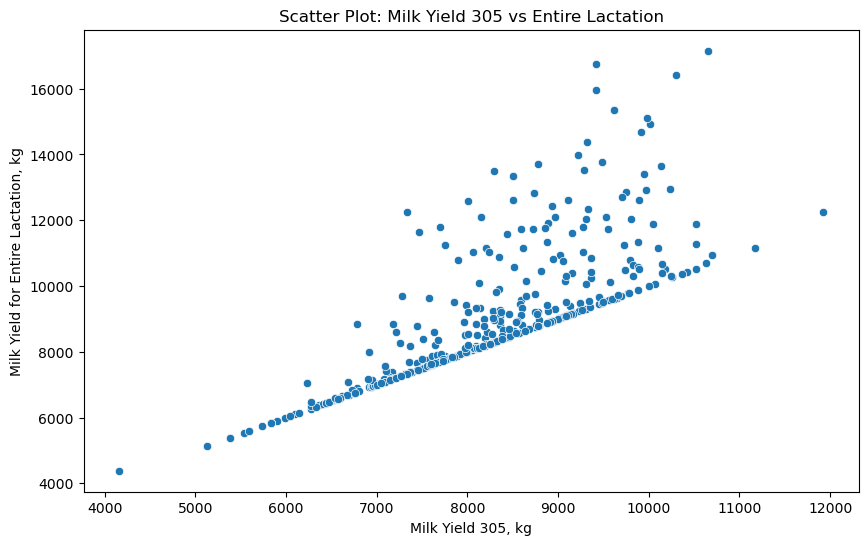

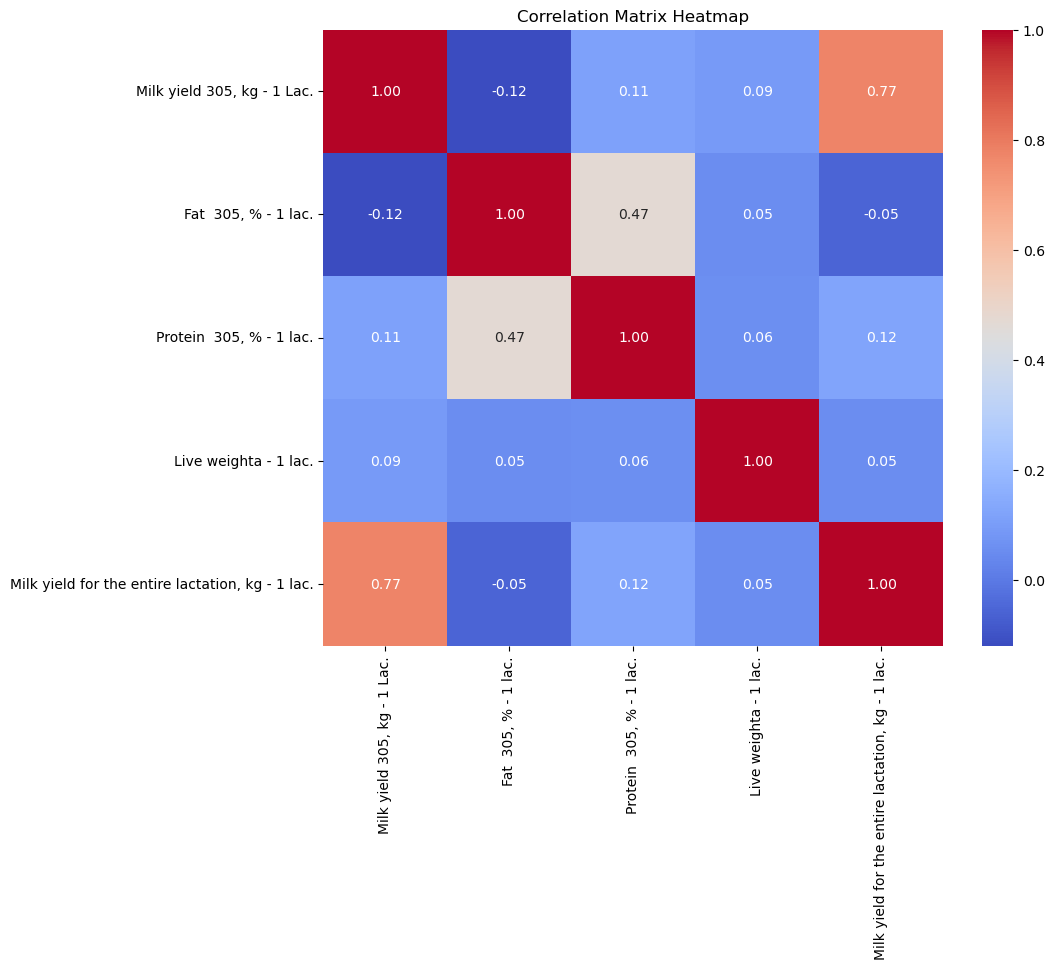

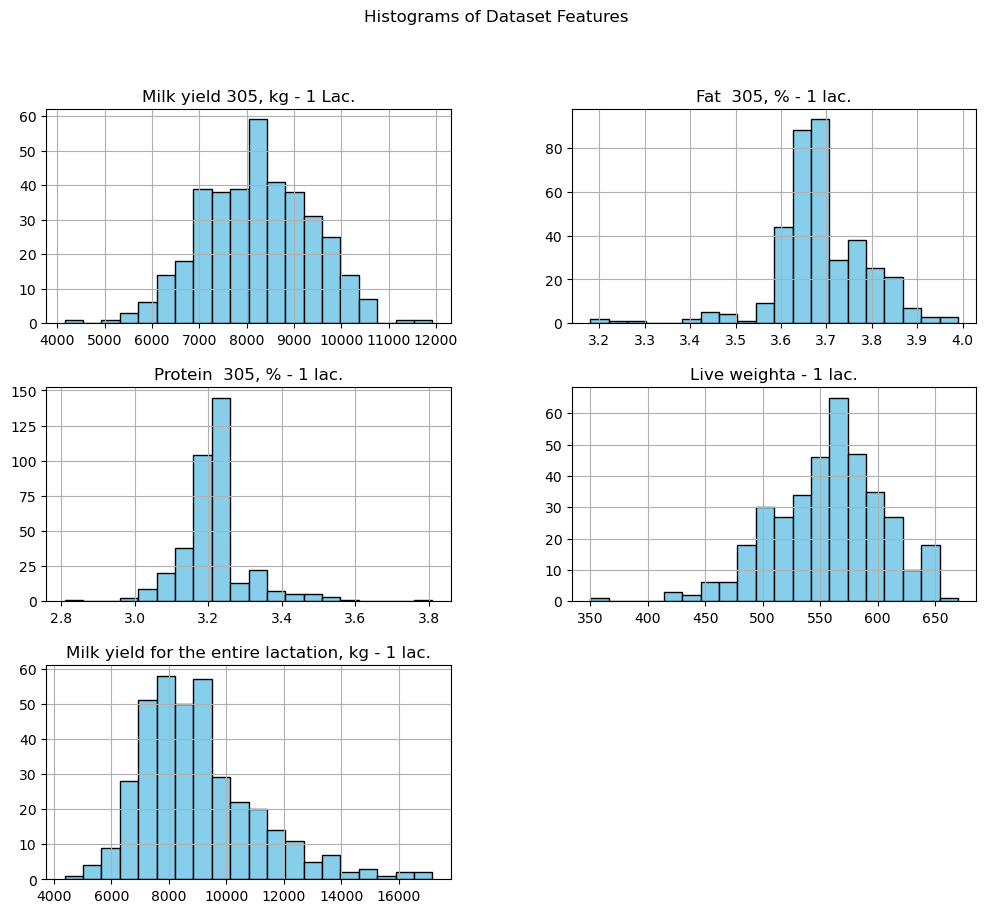

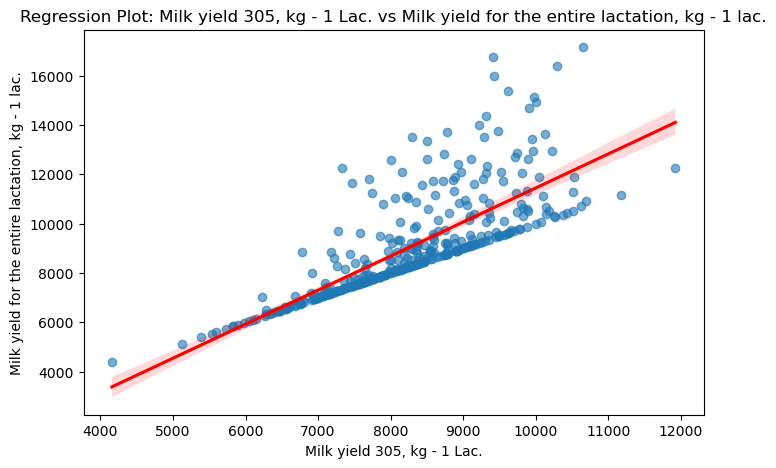

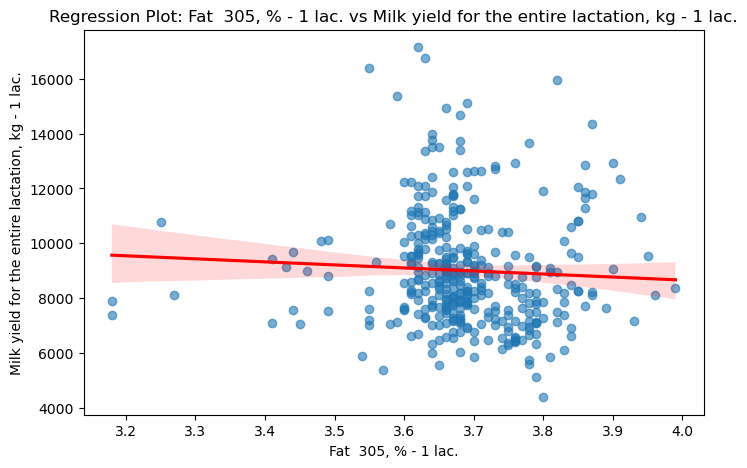

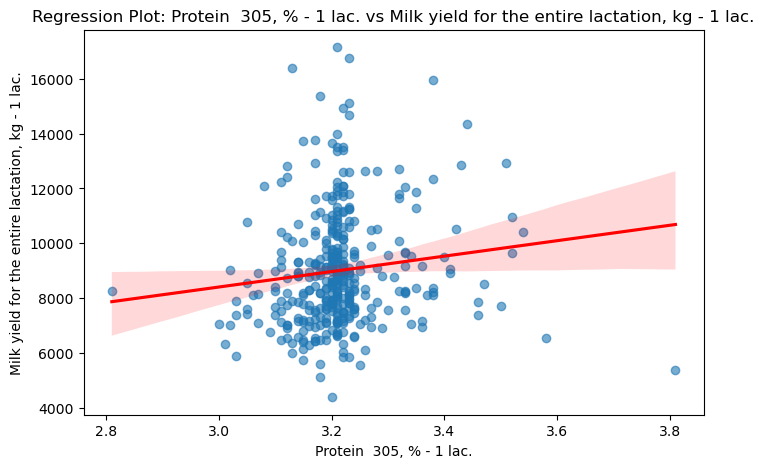

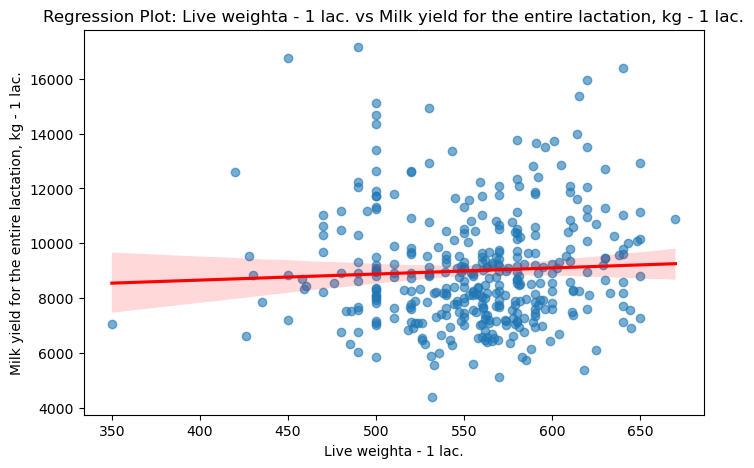

In [4]:
# 1. График рассеяния: объем производства молока за 305 дней vs общий объем за всю лактацию
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Milk yield 305, kg - 1 Lac.', y='Milk yield for the entire lactation, kg - 1 lac.')
plt.title('Scatter Plot: Milk Yield 305 vs Entire Lactation')
plt.xlabel('Milk Yield 305, kg')
plt.ylabel('Milk Yield for Entire Lactation, kg')
plt.show()

# 2. Матрица корреляций (heatmap)
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Гистограммы для каждого параметра
data.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Dataset Features')
plt.show()

# 4. Регрессионные графики для каждой независимой переменной
features = ['Milk yield 305, kg - 1 Lac.', 'Fat  305, % - 1 lac.', 'Protein  305, % - 1 lac.', 'Live weightа - 1 lac.']
target = 'Milk yield for the entire lactation, kg - 1 lac.'

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=data, x=feature, y=target, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

Объяснение кода:
График рассеяния :
Показывает зависимость между объемом производства молока за 305 дней и общим объемом за всю лактацию.
Визуально можно оценить, есть ли линейная связь между этими переменными.
Матрица корреляций (heatmap) :
Позволяет увидеть коэффициенты корреляции между всеми парами переменных.
Яркие цвета указывают на сильную корреляцию, а более темные — на слабую или отсутствие корреляции.
Гистограммы :
Показывают распределение значений для каждой переменной.
Это полезно для выявления выбросов, нормальности распределения и других особенностей данных.
Регрессионные графики :
Для каждой независимой переменной строится график рассеяния с регрессионной линией.
Это позволяет оценить характер зависимости между каждой независимой переменной и целевой переменной.
Результаты визуализации:
График рассеяния : Покажет, как связаны объем производства молока за 305 дней и общий объем за всю лактацию.
Матрица корреляций : Выделит наиболее сильно коррелирующие пары переменных.
Гистограммы : Дадут представление о распределении данных для каждой переменной.
Регрессионные графики : Помогут оценить влияние каждой независимой переменной на целевую переменную.